In [2]:
import numpy as np

from Load_image import *
a= 64
b= 64
folder_path = "./datasets/recognition/train"
X_train,y_train,X_val,y_val = load_images_from_folder_sep(folder_path,test_size=0.2)
folder_path = "./datasets/recognition/test"
X_test,y_test = load_images_from_folder(folder_path)

list = []
num_class, list = count_class("./datasets/recognition/test")
#Numeric the labels set
def numeric(y):
    label_to_index = {label: i for i, label in enumerate(list)}
    y_numeric = np.array([label_to_index[label] for label in y])
    return y_numeric

y_train_numeric = numeric(y_train)
y_val_numeric = numeric(y_val)
y_test_numeric = numeric(y_test)

print(f"Number of loaded training images: {len(X_train)}") 
print(f"Number of loaded validation images: {len(X_val)}") 
print(f"Number of loaded test images: {len(X_test)}") 
print(f"- Classes sets include : {list}")
#print(X_train[0][0][0][0])#pixel value at specific point
#x,y,z=np.array(X_train[0]).shape #size of specific picture
#print(x,y,z)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


Training:  000_hatsune_miku 44
Validating:  000_hatsune_miku 11
Training:  001_kinomoto_sakura 105
Validating:  001_kinomoto_sakura 27
Training:  002_suzumiya_haruhi 65
Validating:  002_suzumiya_haruhi 17
Training:  003_fate_testarossa 51
Validating:  003_fate_testarossa 13
Training:  004_takamachi_nanoha 69
Validating:  004_takamachi_nanoha 18
Training:  005_lelouch_lamperouge 48
Validating:  005_lelouch_lamperouge 13
Training:  006_akiyama_mio 47
Validating:  006_akiyama_mio 12
Training:  008_shana 60
Validating:  008_shana 16
Training:  009_hakurei_reimu 65
Validating:  009_hakurei_reimu 17
Training:  010_izumi_konata 72
Validating:  010_izumi_konata 19
Testing:  000_hatsune_miku 12
Testing:  001_kinomoto_sakura 28
Testing:  002_suzumiya_haruhi 20
Testing:  003_fate_testarossa 16
Testing:  004_takamachi_nanoha 21
Testing:  005_lelouch_lamperouge 14
Testing:  006_akiyama_mio 15
Testing:  008_shana 18
Testing:  009_hakurei_reimu 19
Testing:  010_izumi_konata 22
Number of loaded traini

(626, 64, 64, 3)
Training data shape:  (626, 12288)
(163, 64, 64, 3)
Training data shape:  (163, 12288)
(185, 64, 64, 3)
Training data shape:  (185, 12288)
[169.89297125 174.96325879 186.09105431 167.39616613 172.77795527
 183.81948882 167.24440895 172.75079872 184.80191693 167.46805112]


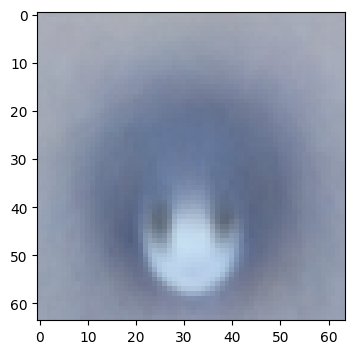

(626, 12289)
(163, 12289)
(185, 12289)


In [3]:
from PreProcess import *
#PreProcessing
X_train= PreProc(X_train,a,b)
X_val= PreProc(X_val,a,b)
X_test= PreProc(X_test,a,b)
####Calc mean#
mean =CalcMean(X_train,a,b)
#Minus for mean
X_train= Minus_mean(X_train,mean)
X_val= Minus_mean(X_val,mean)
X_test= Minus_mean(X_test,mean)

#Bias trick
X_train = Bias_trick(X_train)
X_val = Bias_trick(X_val)
X_test = Bias_trick(X_test)

In [25]:
# In the file linear_classifier.py, implement SGD in the function
# LinearClassifier.train() and then run it with the code below.
from linear_classifier_t import *
import time

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=5e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 2.573104
iteration 100 / 1500: loss 0.195168
iteration 200 / 1500: loss 1.324395
iteration 300 / 1500: loss 0.346226
iteration 400 / 1500: loss 0.087947
iteration 500 / 1500: loss 1.069710
iteration 600 / 1500: loss 0.519319
iteration 700 / 1500: loss 0.359734
iteration 800 / 1500: loss 0.721625
iteration 900 / 1500: loss 0.437451
iteration 1000 / 1500: loss 0.369394
iteration 1100 / 1500: loss 0.480247
iteration 1200 / 1500: loss 0.668391
iteration 1300 / 1500: loss 0.695772
iteration 1400 / 1500: loss 0.222428
That took 17.582191s


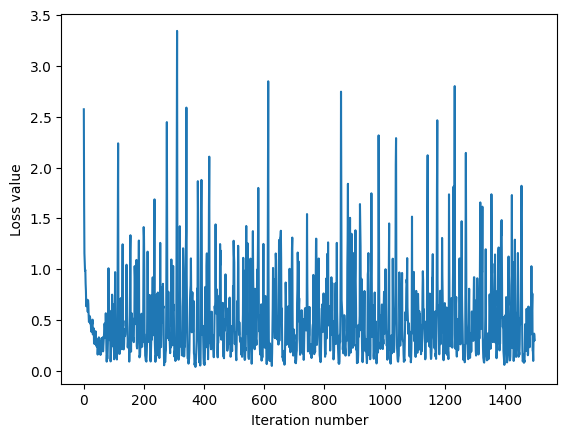

In [26]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number
import matplotlib.pyplot as plt
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [27]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print ('training accuracy: %f' % (np.mean(y_train_numeric == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print(y_val_numeric.shape)
print(y_val_pred.shape)
print ('validation accuracy: %f' % (np.mean(y_val_numeric == y_val_pred), ))

training accuracy: 0.940895
(163,)
(163,)
validation accuracy: 0.662577


In [28]:
from linear_classifier_t import *
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 2e-7, 3e-7, 8e-7]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.
tic = time.time()
for lr in learning_rates:
    for r in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=r,
                      num_iters=2500, verbose=False)
        y_train_pred = svm.predict(X_train)
        #print(y_train_pred.shape)
        y_val_pred = svm.predict(X_val)
        acc_train = np.mean(y_train_numeric == y_train_pred)
        #print(acc_train)
        acc_val = np.mean(y_val_numeric == y_val_pred)
        results[(lr, r)] = (acc_train, acc_val)
        print (lr, r, acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
# print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
toc = time.time()
print ('That took %fp' % ((toc - tic)/60))
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

1e-07 10000.0 0.9984025559105432 0.6748466257668712
1e-07 20000.0 1.0 0.7116564417177914
1e-07 30000.0 1.0 0.7361963190184049
1e-07 40000.0 1.0 0.7361963190184049
1e-07 50000.0 1.0 0.7116564417177914
1e-07 60000.0 0.9984025559105432 0.7423312883435583
1e-07 70000.0 1.0 0.7055214723926381
1e-07 80000.0 0.9904153354632588 0.7055214723926381
1e-07 100000.0 0.9920127795527156 0.7300613496932515
2e-07 10000.0 1.0 0.7484662576687117
2e-07 20000.0 1.0 0.7116564417177914
2e-07 30000.0 0.9968051118210862 0.6993865030674846
2e-07 40000.0 0.9824281150159745 0.7055214723926381
2e-07 50000.0 0.9936102236421726 0.7116564417177914
2e-07 60000.0 1.0 0.7239263803680982
2e-07 70000.0 0.9968051118210862 0.7116564417177914
2e-07 80000.0 0.9712460063897763 0.6871165644171779
2e-07 100000.0 0.9904153354632588 0.7116564417177914
3e-07 10000.0 1.0 0.7239263803680982
3e-07 20000.0 1.0 0.7423312883435583
3e-07 30000.0 0.9233226837060703 0.656441717791411
3e-07 40000.0 0.9313099041533547 0.6748466257668712
3e-07

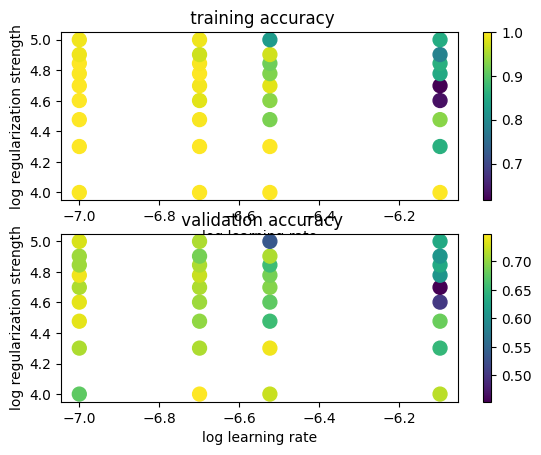

In [44]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title(' validation accuracy')
plt.show()

In [30]:
# Evaluate the best svm on test set
#print(X_test.shape)
y_test_pred = best_svm.predict(X_test)
#test_accuracy = np.mean(y_test_numeric == y_test_pred)
#print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

y_test_numeric = np.array(y_test_numeric)
y_test_pred = np.array(y_test_pred)

#print (y_test_numeric)
#print (y_test_pred)
#print (y_test_numeric == y_test_pred)

In [31]:
###############################Evaluation part###################################

In [32]:
############ calc accuracy ##################################

from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(y_test_numeric, y_test_pred))

accuracy =  0.745945945945946


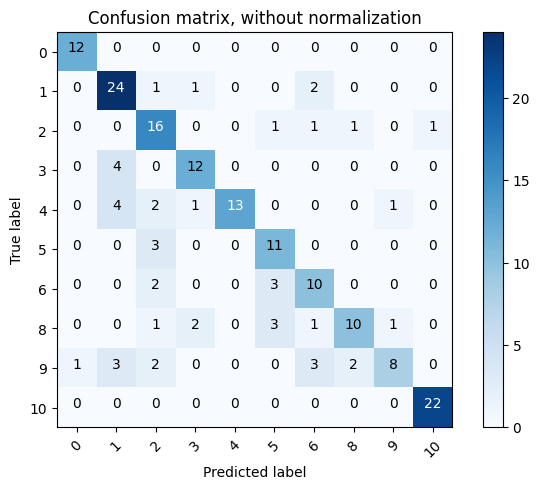

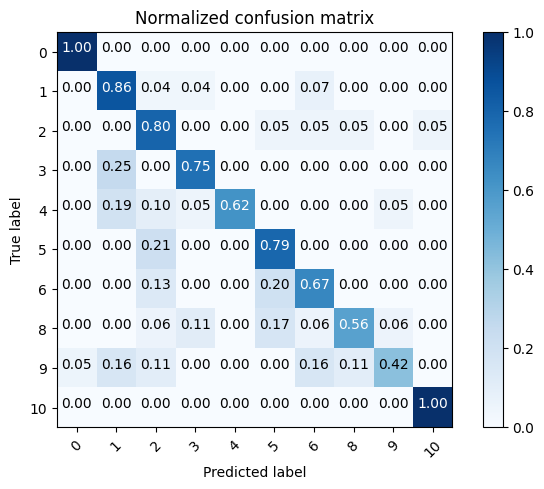

In [33]:
######################### using confusion matrix

import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test_numeric, y_test_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [34]:
###########################Precision and recall part (micro and macro)

def scan_and_detect(X):
    true_pos=[]
    for i in range(len(y_test_numeric)):
        if (X == y_test_numeric[i]): 
            true_pos.append(i)
    return true_pos

def pr(tp, fp, fn):
    p = float(tp)/(tp + fp)
    r = float(tp)/(tp + fn)
    return (p, r)

def calc_things(X):
    tp,fp,fn = 0,0,0
    true = scan_and_detect(X)
    
    for i in range(len(y_test_pred)):
        if i not in true:
            if y_test_pred[i] == X:
                fn +=1
        if i in true :
            if y_test_pred[i] == X:
                tp +=1
            else :
                fp+=1    
    return tp,fp,fn

TP,FP,FN,p,r = np.zeros(num_class),np.zeros(num_class),np.zeros(num_class),np.zeros(num_class),np.zeros(num_class)
total_tp,total_fp,total_fn,macro_ap,macro_ar=0,0,0,0,0

for i in range(num_class):
    TP[i],FP[i],FN[i] = calc_things(i)
    total_tp += TP[i]
    total_fp += FP[i]
    total_fn += FN[i] 
    p[i],r[i] = pr(TP[i],FP[i],FN[i])
    macro_ap += (p[i])/num_class
    macro_ar += (r[i])/num_class
#print(TP,FP,FN)
#print(total_tp,total_fp,total_fn)
micro_ap = float(total_tp)/(total_tp + total_fp)
micro_ar = float(total_tp)/(total_tp + total_fn)

# print out micro average precision and recall
print('(micro-average precision, micro-average racall) = (%.2f, %.2f)' % (micro_ap, micro_ar))
# print out macro average precision and recall
print('(micro-average precision, micro-average racall) = (%.2f, %.2f)' % (macro_ap, macro_ar))

(micro-average precision, micro-average racall) = (0.75, 0.75)
(micro-average precision, micro-average racall) = (0.75, 0.77)


In [35]:
####################F1-score

mirco_F1= 2*(micro_ap*micro_ar)/(micro_ap+micro_ar)
macro_F1= 2*(macro_ap*macro_ar)/(macro_ap+macro_ar)
print('(micro F1-score, macro F1-score) = (',mirco_F1,macro_F1,')')

(micro F1-score, macro F1-score) = ( 0.7459459459459459 0.7564212867869443 )


In [36]:
################################################################################################################

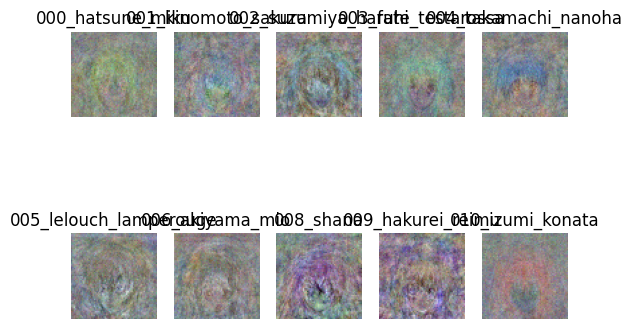

In [37]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(a, b, 3, 10)
w_min, w_max = np.min(w), np.max(w)

for i in range(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(list[i])

In [1]:
#print(w.shape)
#print(w)

In [39]:
##############################################################################################################

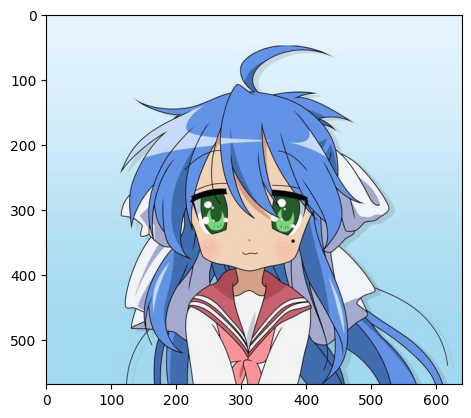

In [40]:
img = cv2.imread("./datasets/sample2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [41]:
import matplotlib.pyplot as plt

resize_size = (a, b)

img = cv2.resize(img, resize_size)
img = img.astype('float64')  # visualize the mean image
X = np.array(img)
print(X.shape)
X = X.flatten()
print('Training data shape: ', X.shape)

#import matplotlib.pyplot as plt
# first: compute the image mean based on the training data
mean_image = np.mean(X)
print(mean_image)  # print a few of the elements


#Minus for mean
X -= mean
#Bias trick
img_1 = np.append(X, 1)
print(X.shape)  # , X_dev.shape

y_test_pred = best_svm.predict(img_1)
test_accuracy = np.mean(y_test_numeric == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)
print("it is : ",list[y_test_pred])

(64, 64, 3)
Training data shape:  (12288,)
198.15470377604166
(12288,)
linear SVM on raw pixels final test set accuracy: 0.118919
it is :  010_izumi_konata


In [43]:
# save weights into file and load it
import pickle
import numpy as np

with open("weights_data.pkl", "wb") as file:
    pickle.dump(best_svm.W, file)


In [23]:
#load data from file
from linear_classifier_t import *
import pickle
import numpy as np


svm = LinearSVM()
with open("weights_data.pkl", "rb") as file:
    svm.W = pickle.load(file)
best_svm=svm
print(best_svm.W)

[[-3.88383482e-06 -1.38706784e-05 -5.89144362e-06 ...  1.48500642e-06
   1.08265940e-06 -5.52887031e-07]
 [ 4.37834247e-07 -8.55732225e-06 -6.98839588e-06 ...  7.51180922e-06
  -7.25890097e-06  7.97509682e-06]
 [-1.22745530e-06 -1.14855279e-05 -2.11538994e-06 ...  6.01812167e-06
   3.64550355e-06  7.55135564e-06]
 ...
 [-5.25003796e-06  2.74187260e-06 -6.41269761e-06 ... -4.00449259e-07
   1.45653181e-05 -6.04554009e-06]
 [-3.66536866e-06  7.98799739e-06 -1.59426945e-05 ...  1.15922819e-05
   1.68420179e-05 -2.16576630e-07]
 [-1.26917732e-06 -4.56252837e-07  7.57374687e-07 ...  2.48546139e-07
   8.82645435e-07 -9.05400532e-07]]
